# Visualizing BO results

In [10]:
import numpy as np 

# read the npy data from results
rdkit_gprq = np.load('./results/lipo_rdkit_ratio0.05_iter20_trial10GPRQ.npy', allow_pickle=True).item()
#rdkit_rf = np.load('./results/lipo_rdkit_ratio0.05_iter20_trial10RandomForest.npy', allow_pickle=True).item()

mol2vec_gprq = np.load('./results/lipo_mol2vec_ratio0.05_iter20_trial10GPRQ.npy', allow_pickle=True).item()
mol2vec_rf = np.load('./results/lipo_mol2vec_ratio0.05_iter20_trial10RandomForest.npy', allow_pickle=True).item()

e3fp_gptani = np.load('./results/lipo_e3fp_ratio0.05_iter20_trial10GPTanimoto.npy', allow_pickle=True).item()
e3fp_rf = np.load('./results/lipo_e3fp_ratio0.05_iter20_trial10RandomForest.npy', allow_pickle=True).item()

ecfp_gptani = np.load('./results/lipo_ecfp_ratio0.05_iter20_trial10GPTanimoto.npy', allow_pickle=True).item()
ecfp_rf = np.load('./results/lipo_ecfp_ratio0.05_iter20_trial10RandomForest.npy', allow_pickle=True).item()

In [13]:
num_trial = len(mol2vec_gprq['bests_over_trials'])
num_iter = len(mol2vec_gprq['bests_over_trials'][0])

rdkit_gprq_best_observed = np.array(rdkit_gprq['bests_over_trials'])
#rdkit_RF_best_observed = np.array(rdkit_rf['bests_over_trials'])

mol2vec_gprq_best_observed = np.array(mol2vec_gprq['bests_over_trials'])
mol2vec_rf_best_observed = np.array(mol2vec_rf['bests_over_trials'])

e3fp_gptani_best_observed = np.array(e3fp_gptani['bests_over_trials'])
e3fp_rf_best_observed = np.array(e3fp_rf['bests_over_trials'])

ecfp_gptani_best_observed = np.array(ecfp_gptani['bests_over_trials'])
ecfp_rf_best_observed = np.array(ecfp_rf['bests_over_trials'])


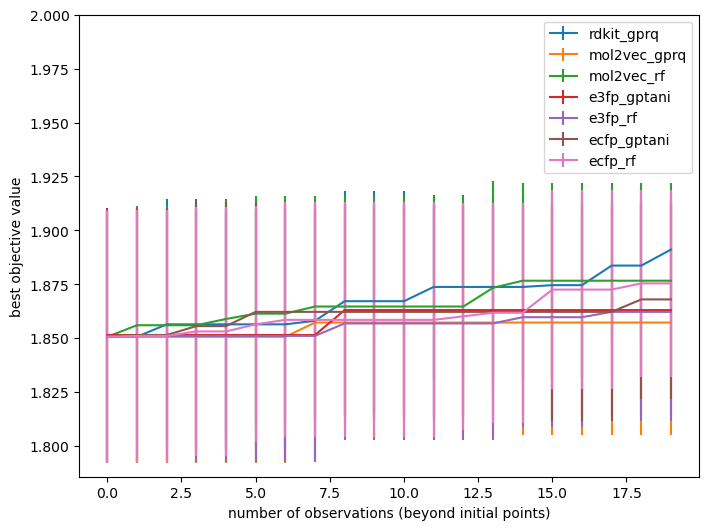

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
def ci(y):
    return 1.96 * y.std(axis=0) / np.sqrt(num_trial)

#plot the df data and add 
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
#plot errorbar from the mean and std of the best observed value
ax.errorbar(x=np.arange(num_iter), y=rdkit_gprq_best_observed.mean(axis=0), yerr=ci(rdkit_gprq_best_observed), label="rdkit_gprq", linewidth=1.5)
#ax.errorbar(x=np.arange(num_iter), y=rdkit_rf_best_observed.mean(axis=0), yerr=ci(rdkit_rf_best_observed), label="rdkit_rf", linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=mol2vec_gprq_best_observed.mean(axis=0), yerr=ci(mol2vec_gprq_best_observed), label="mol2vec_gprq", linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=mol2vec_rf_best_observed.mean(axis=0), yerr=ci(mol2vec_rf_best_observed), label="mol2vec_rf", linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=e3fp_gptani_best_observed.mean(axis=0), yerr=ci(e3fp_gptani_best_observed), label="e3fp_gptani", linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=e3fp_rf_best_observed.mean(axis=0), yerr=ci(e3fp_rf_best_observed), label="e3fp_rf", linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=ecfp_gptani_best_observed.mean(axis=0), yerr=ci(ecfp_gptani_best_observed), label="ecfp_gptani", linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=ecfp_rf_best_observed.mean(axis=0), yerr=ci(ecfp_rf_best_observed), label="ecfp_rf", linewidth=1.5)


#set labels
ax.set(
    xlabel="number of observations (beyond initial points)",
    ylabel="best objective value",
)
ax.set_ylim(top=2.0)
ax.legend(loc="upper right")

count hit numbers above threshold

In [16]:
#load the data for ground truth checking
from data_helper import load_lipo_feat
X, y = load_lipo_feat(filename='data/lipo_{}.csv'.format('rdkit'))

# count the number of molecules added in each iteration are above the threshold
def hit_count(y, threshold, mol_added):
    num_trial = len(mol_added)
    num_iter = len(mol_added[0])
    hit_count = np.zeros((num_trial,num_iter))
    for trial in range(num_trial):
        mol_above_threshold = []
        counter = 0
        for mol_index in mol_added[trial]:
            if y[int(mol_index)] > threshold:
                counter += 1
            mol_above_threshold.append(counter)
        hit_count[trial] = mol_above_threshold
    return hit_count



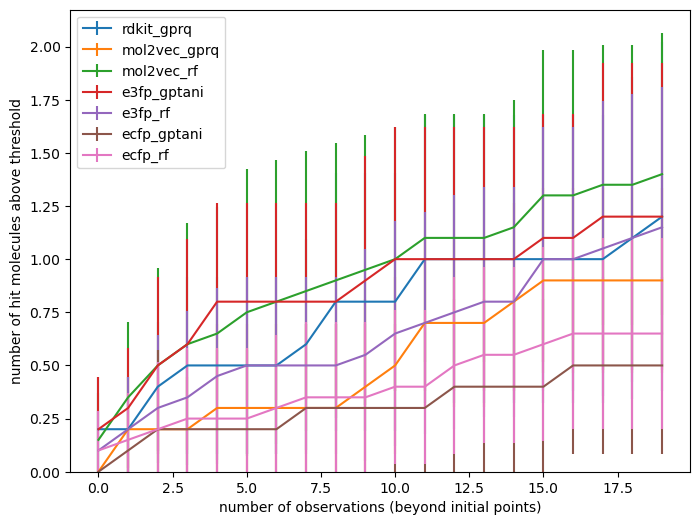

In [22]:
lipo_threshold = 1.6
# count the number of molecules added in each iteration are above the threshold
rdkit_gprq_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=rdkit_gprq['mol_added'])
#rdkit_rf_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=rdkit_rf['mol_added'])
mol2vec_gprq_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=mol2vec_gprq['mol_added'])
mol2vec_rf_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=mol2vec_rf['mol_added'])
e3fp_gptani_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=e3fp_gptani['mol_added'])
e3fp_rf_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=e3fp_rf['mol_added'])
ecfp_gptani_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=ecfp_gptani['mol_added'])
ecfp_rf_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=ecfp_rf['mol_added'])


#plot the df data and add 
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
#plot errorbar from the mean and std of the best observed value
ax.errorbar(x=np.arange(num_iter), y=rdkit_gprq_hit_count.mean(axis=0), yerr=ci(rdkit_gprq_hit_count), label="rdkit_gprq", linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=mol2vec_gprq_hit_count.mean(axis=0), yerr=ci(mol2vec_gprq_hit_count), label="mol2vec_gprq", linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=mol2vec_rf_hit_count.mean(axis=0), yerr=ci(mol2vec_rf_hit_count), label="mol2vec_rf", linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=e3fp_gptani_hit_count.mean(axis=0), yerr=ci(e3fp_gptani_hit_count), label="e3fp_gptani", linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=e3fp_rf_hit_count.mean(axis=0), yerr=ci(e3fp_rf_hit_count), label="e3fp_rf", linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=ecfp_gptani_hit_count.mean(axis=0), yerr=ci(ecfp_gptani_hit_count), label="ecfp_gptani", linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=ecfp_rf_hit_count.mean(axis=0), yerr=ci(ecfp_rf_hit_count), label="ecfp_rf", linewidth=1.5)
#set labels
ax.set(
    xlabel="number of observations (beyond initial points)",
    ylabel="number of hit molecules above threshold",
)
ax.set_ylim(bottom=0.0)
ax.legend(loc="upper left")